In [132]:
# DATA ANALYTICS
# LABORATORIES #1
# "Python review"

In [133]:
# NOTES FROM LABS:
#    df.loc[:, []]
#    df.iloc[ , ]
#    df.theta_1.plot
#    df['theta_1']
#    Time Series plot - data with index
#    Histogram plot - melting is required

In [134]:
#Import Data1.csv file to python.
import pandas as pd

data = pd.read_csv("Data1.csv")
print(data) #[1095 rows x 7 columns]

      Unnamed: 0   theta_1   theta_2   theta_3   theta_4   theta_5    theta_6
0     2017-01-01  0.756936 -1.467790  0.096136 -0.115306 -0.447908   0.902579
1     2017-01-02  0.767089  0.185797 -1.428536 -0.086443 -0.954288   1.930909
2     2017-01-03  0.404544  1.415887  0.443466  0.000200 -0.892351   2.449691
3     2017-01-04  1.313957 -1.804471 -0.836986  0.011785 -1.012518   1.182085
4     2017-01-05  0.209862  1.315868  0.140993 -0.046473 -1.417092   1.742433
...          ...       ...       ...       ...       ...       ...        ...
1090  2019-12-27 -1.520171 -1.128868  1.108275  0.936817  0.948045  11.755980
1091  2019-12-28  0.338910 -3.178251  1.484579  1.051123  1.025288  11.397092
1092  2019-12-29  0.263781  0.045725 -0.112476  0.823782  0.914111  10.918941
1093  2019-12-30 -0.425098 -1.002701 -0.834294  0.850904  0.801977  11.140722
1094  2019-12-31  0.848302  3.510521 -0.280626  0.967050  1.091803  11.989975

[1095 rows x 7 columns]


In [135]:
print(type(data)) #DataFrame

<class 'pandas.core.frame.DataFrame'>


In [136]:
data.columns

Index(['Unnamed: 0', 'theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5',
       'theta_6'],
      dtype='object')

In [137]:
data.rename( columns={'Unnamed: 0':'date'}, inplace=True )

In [138]:
data.columns

Index(['date', 'theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5',
       'theta_6'],
      dtype='object')

In [139]:
#Set first column as the index.

# When we extraxt one columnd from whole data it's no longer a DATA FRAME
# It becomes DATA SERIES
index = data.iloc[:, 0]
print(index)

0       2017-01-01
1       2017-01-02
2       2017-01-03
3       2017-01-04
4       2017-01-05
           ...    
1090    2019-12-27
1091    2019-12-28
1092    2019-12-29
1093    2019-12-30
1094    2019-12-31
Name: date, Length: 1095, dtype: object


In [140]:
print(type(index)) #Series

<class 'pandas.core.series.Series'>


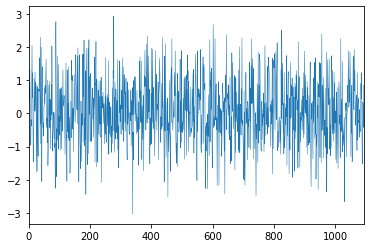

In [141]:
#Plot all columns as time series.

data['theta_1'].plot(linewidth=0.5);

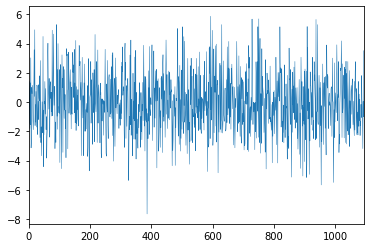

In [142]:
data['theta_2'].plot(linewidth=0.5);

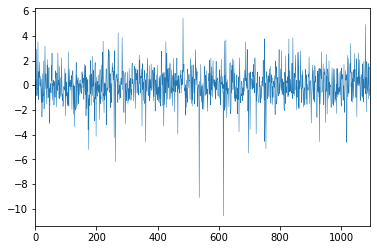

In [143]:
data['theta_3'].plot(linewidth=0.5);

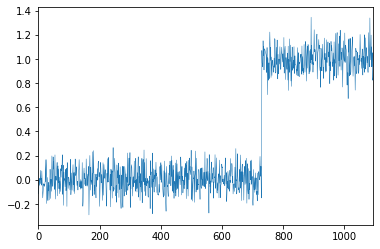

In [144]:
data['theta_4'].plot(linewidth=0.5);

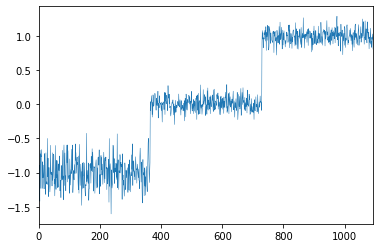

In [145]:
data['theta_5'].plot(linewidth=0.5);

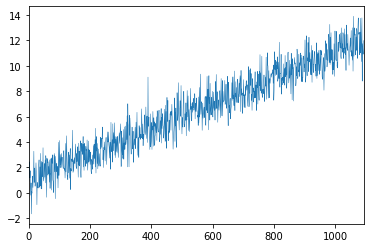

In [146]:
data['theta_6'].plot(linewidth=0.5);

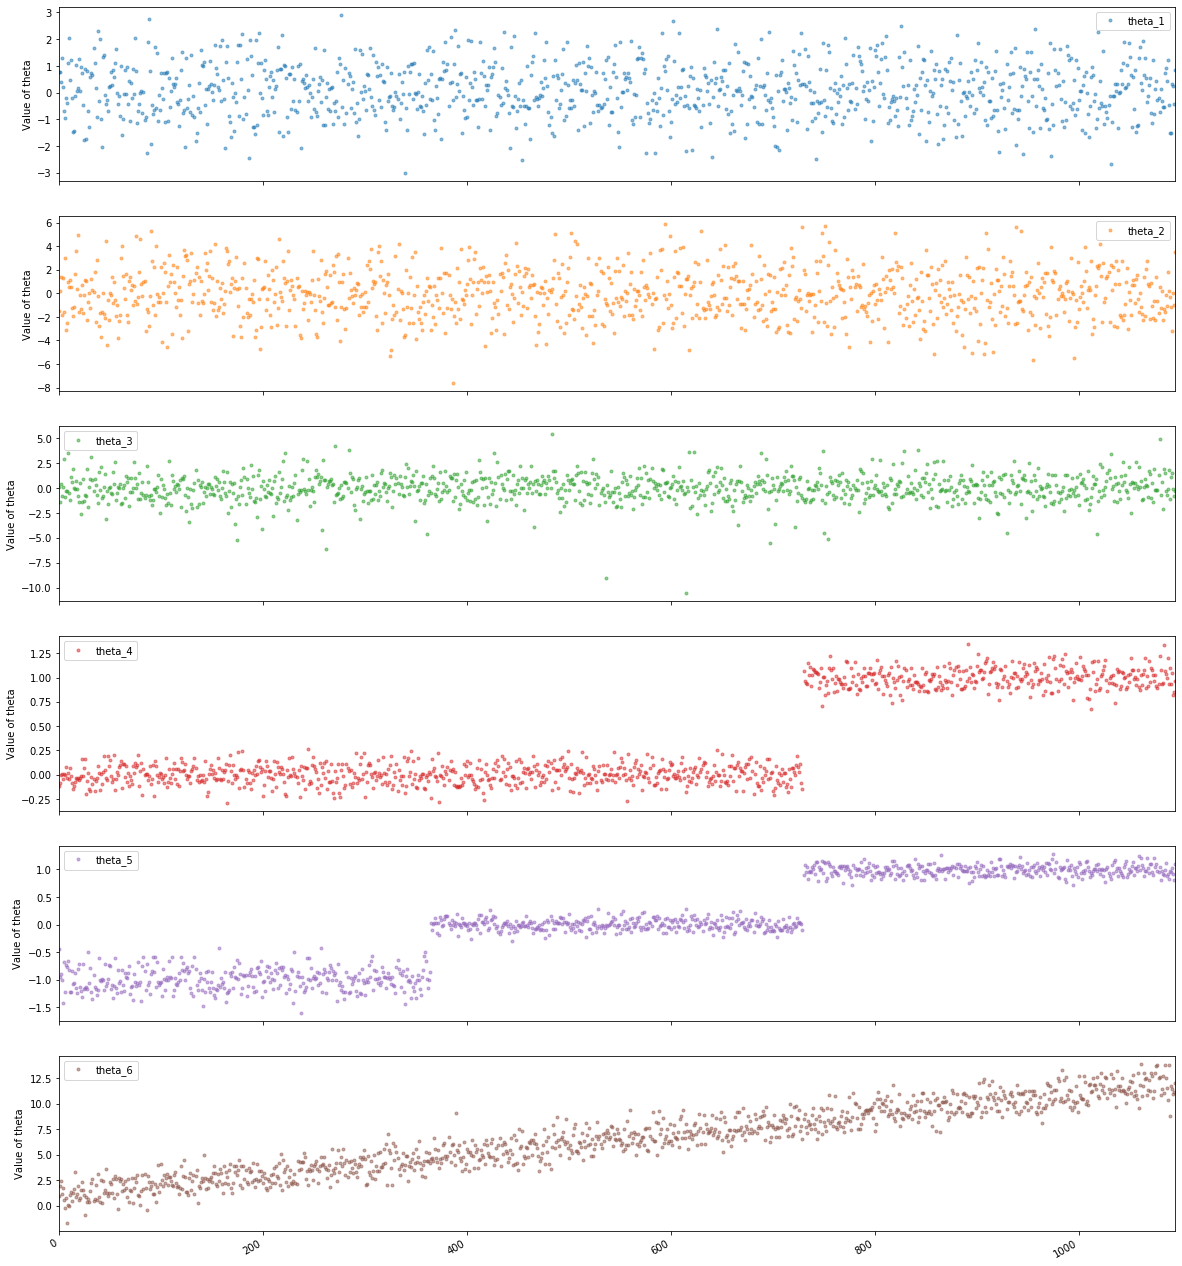

In [147]:
cols_plot = ['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 25), subplots=True)
for ax in axes:
    ax.set_ylabel('Value of theta')

In [198]:
#Melting Data Frame
# This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars),
# while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis,
# leaving just two non-identifier columns, ‘variable’ and ‘value’.

data_melt = pd.melt(data, value_vars=['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6'])

In [199]:
print(data_melt)

     variable      value
0     theta_1   0.756936
1     theta_1   0.767089
2     theta_1   0.404544
3     theta_1   1.313957
4     theta_1   0.209862
...       ...        ...
6565  theta_6  11.755980
6566  theta_6  11.397092
6567  theta_6  10.918941
6568  theta_6  11.140722
6569  theta_6  11.989975

[6570 rows x 2 columns]


In [210]:
data_melt.columns

Index(['variable', 'value'], dtype='object')

In [211]:
variable = data_melt.variable
print(variable)

0       theta_1
1       theta_1
2       theta_1
3       theta_1
4       theta_1
         ...   
6565    theta_6
6566    theta_6
6567    theta_6
6568    theta_6
6569    theta_6
Name: variable, Length: 6570, dtype: object


In [212]:
value = data_melt.value
print(value)

0        0.756936
1        0.767089
2        0.404544
3        1.313957
4        0.209862
          ...    
6565    11.755980
6566    11.397092
6567    10.918941
6568    11.140722
6569    11.989975
Name: value, Length: 6570, dtype: float64


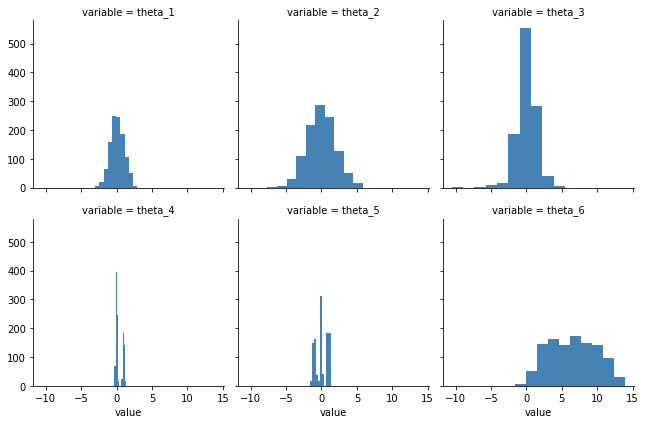

In [233]:
#Plot histograms of all columns, verify bin size. Plot all on single faceted plot.

# In statistics, data is usually sorted in one way or another. You might sort the data into classes, categories, by range or placement on the number line.
# A bin—sometimes called a class interval—is a way of sorting data in a histogram.
# It’s very similar to the idea of putting data into categories.

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data=data_melt,col='variable',col_wrap=3)

#bins = np.linspace(0, 60, 13)
#grid.map(plt.hist, "value", color="steelblue", bins=bins)

grid.map(plt.hist, "value", color="steelblue")

#Verify bin size:
# The highest value:
# The lowest value:

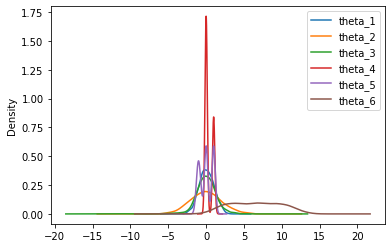

In [234]:
#Plot KDE-s for all columns.

# KDE = kernel density estimation is a non-parametric way to estimate the probability density function (PDF) of a random variable.
# This function uses Gaussian kernels and includes automatic bandwidth determination.
data.plot.kde()

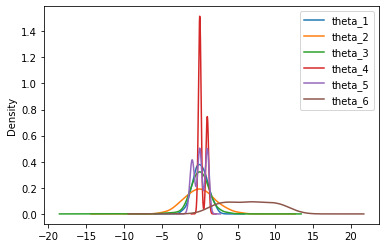

In [235]:
data.plot.kde(bw_method=0.3)

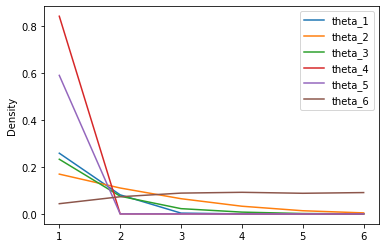

In [236]:
data.plot.kde(ind=[1, 2, 3, 4, 5, 6])

In [ ]:
#Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.